<a href="https://colab.research.google.com/github/SJanna/OptimizationProblems/blob/main/Tylor_and_Convex_Combination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 2

In [270]:
import sympy as sp
x = sp.Symbol('x')
f= sp.cos(x)
a=3.5 #Punto de evaluación
n1=5 #Indica hasta la n derivada que se hará el polinomio 1
n2=12 #Indica hasta la n derivada que se hará el polinomio 2
def error_absoluto (funcion_real, funcion_aprox, nprueba):
    vreal=funcion_real.subs(x,nprueba)
    vaprox=funcion_aprox.subs(x,nprueba)
    return float(vreal-vaprox)

def taylor(f,a,n):
    fx=0
    for i in range(0,n+1):
        fna=sp.diff(f,x,i).subs(x,a)
        fx += (fna*(x-a)**i)/sp.factorial(i)
    return fx

Polinomio 1 ↓

In [271]:
#taylor(funcion,punto_expación,n1,n2) ->n2 > n1
pol1=taylor(f,a,n1)
pol1

0.35078322768962*x + 1.53531606973423*(0.285714285714286*x - 1)**5 - 5.8552929848573*(0.285714285714286*x - 1)**4 - 2.50663848119874*(0.285714285714286*x - 1)**3 + 5.73579720965613*(0.285714285714286*x - 1)**2 - 2.16419798420447

Polinomio 2 ↓

In [272]:
pol2=taylor(f,a,n2)
pol2

0.35078322768962*x - 0.00660643647662105*(0.285714285714286*x - 1)**12 - 0.00848460424032749*(0.285714285714286*x - 1)**11 + 0.0711877236664472*(0.285714285714286*x - 1)**10 + 0.0761882829743693*(0.285714285714286*x - 1)**9 - 0.523011847345326*(0.285714285714286*x - 1)**8 - 0.44780052033915*(0.285714285714286*x - 1)**7 + 2.39091130215006*(0.285714285714286*x - 1)**6 + 1.53531606973423*(0.285714285714286*x - 1)**5 - 5.8552929848573*(0.285714285714286*x - 1)**4 - 2.50663848119874*(0.285714285714286*x - 1)**3 + 5.73579720965613*(0.285714285714286*x - 1)**2 - 2.16419798420447

Errores ↓

In [273]:
p_evaluacion=1
print(f'Error para el polinomio 1: {error_absoluto(f,pol1,p_evaluacion)}')
print(f'Error para el polinomio 2: {error_absoluto(f,pol2,p_evaluacion)}')

Error para el polinomio 1: 0.3234408534537622
Error para el polinomio 2: -4.250459151137068e-06



**Concluciones sobre el error** \\
Por lo general el error es menor para un **n** mayor de la misma función, que es lo esperado ya que la aproximación es más cercana.
Sin embargo para algunos $n$ (cercanos) el error dado por un $n_1 < n_2$ puede ser menor que el error que produce $n_2$

#Problema 1

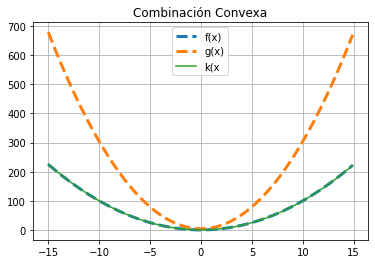

In [307]:
%matplotlib inline

import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

x, t = sp.symbols('x t')


#Funciones
def f(x):
  return x**2

def g(x):
  return 3*x**2 + 4

def k(x,t):
  return (1-t)*f(x) + t*g(x)

#Grafico animado
rc('animation', html='jshtml')

fig, ax = plt.subplots()
x = np.arange(-15, 15, 0.1)

#Dibuja la función f(x)
fx, = ax.plot(x,f(x),linestyle = 'dashed',linewidth = '3',label='f(x)') 
fx.set_ydata(f(x))

#Dibuja la función g(x)
fg, = ax.plot(x,g(x),linestyle = 'dashed',linewidth = '3',label='g(x)')
fg.set_ydata(g(x))

fk, = ax.plot(x, k(x,0),label='k(x')
def animate(i): #Dibuja la función k(x)
    fk.set_ydata(k(x,i/50))
    return fk,

#Anima la función k(x)
ani = animation.FuncAnimation(
    fig, animate, interval=60, blit=True, save_count=50) 

plt.title("Combinación Convexa")
plt.legend()
plt.grid()

Grafica animada

In [308]:
ani

**Conclusiones por exploración gráfica**

$k(x)$ que es la función resultante de la combinación convexa de las funciones $f(x)$ y $g(x)$, ambas convexas, siempre será una función convexa. Esto se puede ver en la gráfica ya que $k(x)$ se mueve entre $f(x)$ y $g(x)$ por lo que $k(x)$ no puede adoptar una forma distinta a la convexa. 